### I. Introduction

### II. Import Library

In [1]:
random = 12
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# split data into train and test
from sklearn.model_selection import train_test_split

# check outlier
from util.feature_engineering import detect_outlier

# pipeline
from sklearn.pipeline import Pipeline

# feature scaling and encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# sklearn ColumnTransformer
from sklearn.compose import ColumnTransformer

#tf
import tensorflow as tf

# modeling
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

# metrics
from sklearn.metrics import classification_report, accuracy_score


### III. Loading Dataset

In [2]:
df = pd.read_csv('dataset_final.csv')
df.head(25)

,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,sensor,type
0,-11.98,-10.99,-19.12,-17.28,-33.13,-28.45,-48.83,-40.77,-62.49,-50.82,QCM10,1-Octanol
1,-12.15,-11.33,-22.33,-19.95,-39.82,-33.64,-56.90,-46.77,-73.32,-58.96,QCM10,1-Octanol
2,-12.58,-11.74,-26.67,-23.34,-46.48,-38.69,-65.95,-53.46,-84.53,-67.21,QCM10,1-Octanol
3,-13.79,-12.82,-30.56,-26.18,-52.30,-42.98,-73.81,-59.19,-94.41,-74.40,QCM10,1-Octanol
4,-15.73,-13.87,-34.54,-28.65,-57.44,-46.26,-80.37,-63.49,-102.94,-80.25,QCM10,1-Octanol
5,-58.41,-38.66,-83.58,-57.33,-110.24,-76.80,-133.77,-96.13,-171.05,-124.15,QCM10,1-Propanol
6,-59.68,-40.01,-84.75,-58.75,-109.91,-77.28,-130.65,-94.69,-161.81,-118.70,QCM10,1-Propanol
7,-60.12,-40.73,-85.19,-59.47,-108.08,-76.43,-127.51,-92.88,-155.54,-114.76,QCM10,1-Propanol
8,-60.41,-41.20,-84.73,-59.31,-106.46,-75.39,-124.62,-90.88,-151.56,-112.58,QCM10,1-Propanol
9,-60.87,-39.88,-84.22,-57.58,-105.32,-73.36,-122.59,-88.28,-146.99,-109.52,QCM10,1-Propanol


In [3]:
df.shape

(125, 12)

### IV. Exploratory Data Analysis

#### 1. Statistic Summary & Data Overview

Numerical Variable

In [4]:
df.describe()

,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,-52.384480,-51.529200,-82.660160,-78.155200,-117.079120,-107.839040,-151.437360,-138.120160,-190.693680,-173.198880
std,26.613388,24.374974,42.272666,36.560875,62.101935,52.594443,82.641805,70.392947,108.159961,92.772823
min,-98.990000,-102.020000,-174.990000,-158.710000,-261.380000,-224.800000,-341.090000,-289.880000,-447.740000,-381.940000
25%,-69.990000,-66.490000,-110.460000,-105.210000,-157.610000,-144.980000,-210.780000,-189.320000,-263.800000,-250.300000
50%,-58.410000,-55.730000,-91.650000,-82.390000,-118.700000,-105.510000,-156.310000,-126.300000,-192.030000,-157.010000
75%,-28.790000,-35.170000,-43.820000,-50.840000,-58.240000,-68.000000,-75.410000,-77.510000,-93.950000,-91.330000
max,-9.400000,-7.950000,-14.430000,-17.280000,-24.640000,-27.350000,-35.280000,-39.910000,-40.630000,-49.870000


Insight :

* All Columns have non null-values, indicating there's no missing values in the numerical features
* From the Air ratio vs Gas ratio, the higest of the Air Ratio the lowest the values for Mean and Standar Deviation for each experiment

Categorical Variable

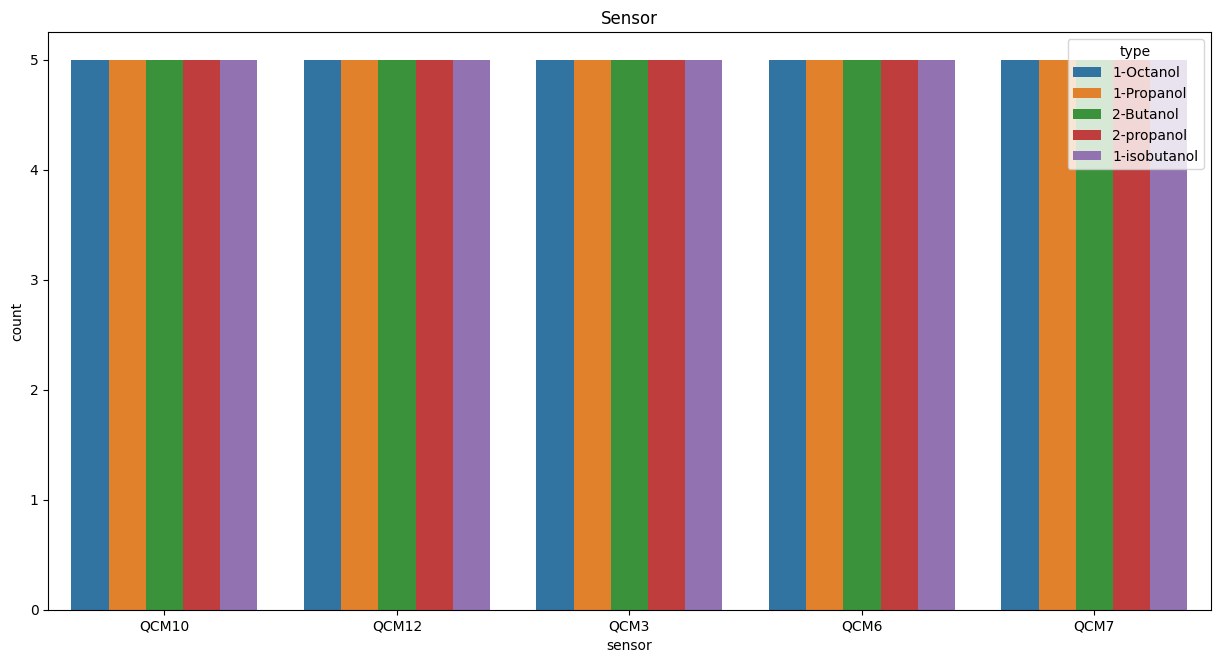

In [5]:
plt.figure(figsize=(15,7.5))
sns.countplot(x=df.sensor,hue=df.type)
plt.title('Sensor')
plt.show()

Insight :
* we can see from the experiemnt all sensor detected five different kind of alcohol types

#### 2. Histogram And Boxplot

We create Histogram to visualize the data distribution and Boxplot to detect if any outliers occur.

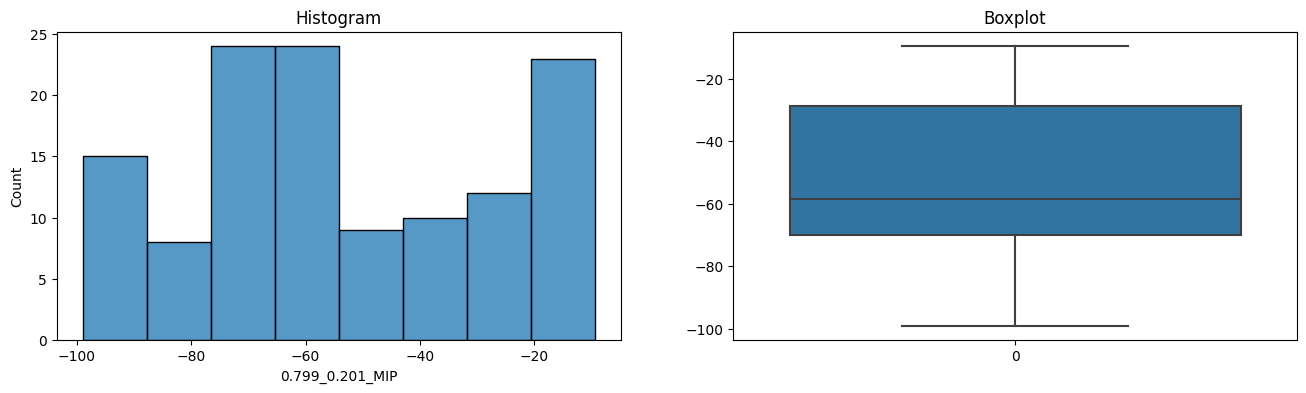

In [8]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.799_0.201_MIP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.799_0.201_MIP'])
plt.title('Boxplot')

plt.show()

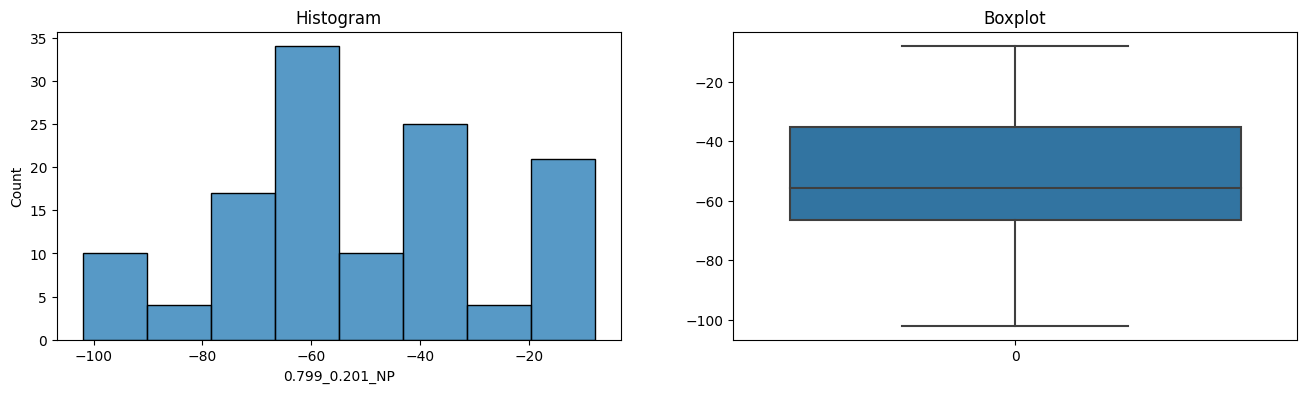

In [9]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.799_0.201_NP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.799_0.201_NP'])
plt.title('Boxplot')

plt.show()

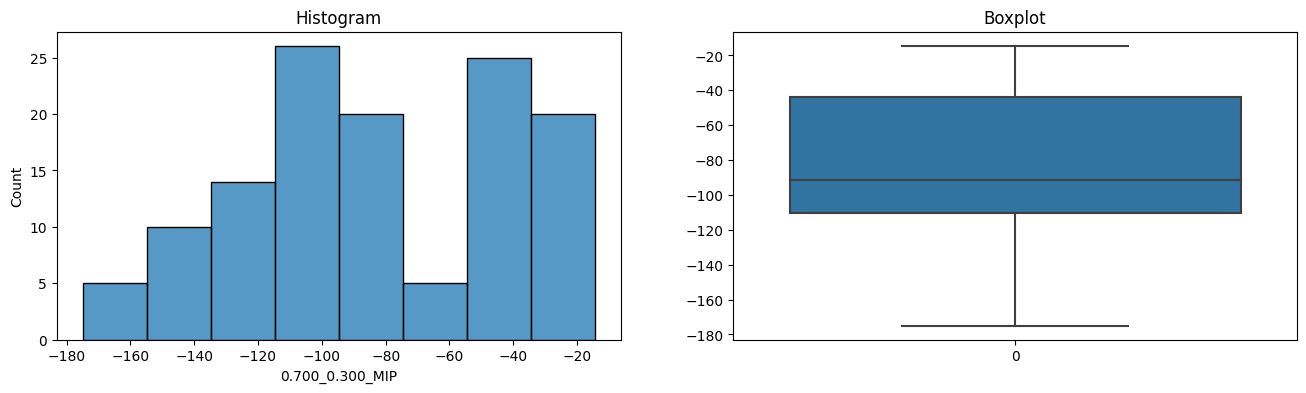

In [10]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.700_0.300_MIP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.700_0.300_MIP'])
plt.title('Boxplot')

plt.show()

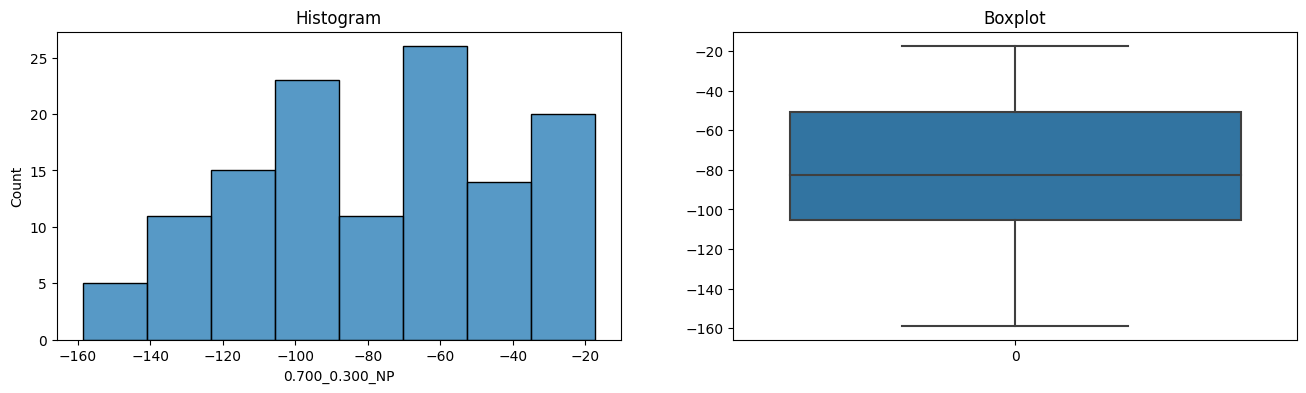

In [11]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.700_0.300_NP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.700_0.300_NP'])
plt.title('Boxplot')

plt.show()

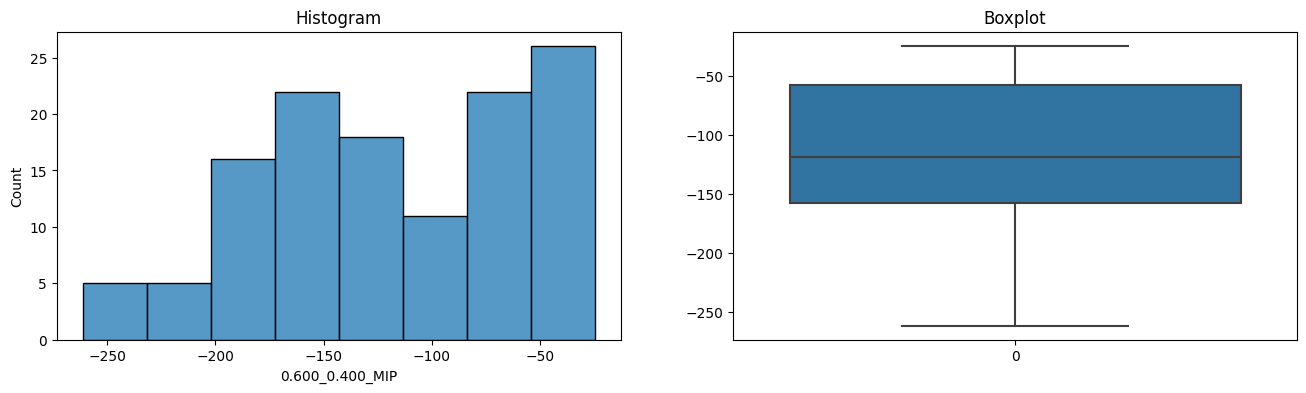

In [12]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.600_0.400_MIP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.600_0.400_MIP'])
plt.title('Boxplot')

plt.show()

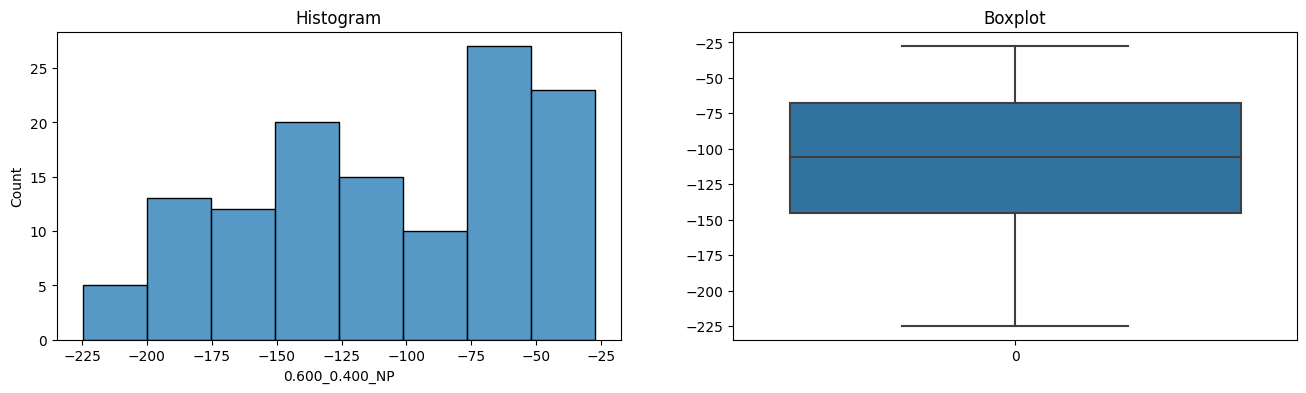

In [13]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.600_0.400_NP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.600_0.400_NP'])
plt.title('Boxplot')

plt.show()

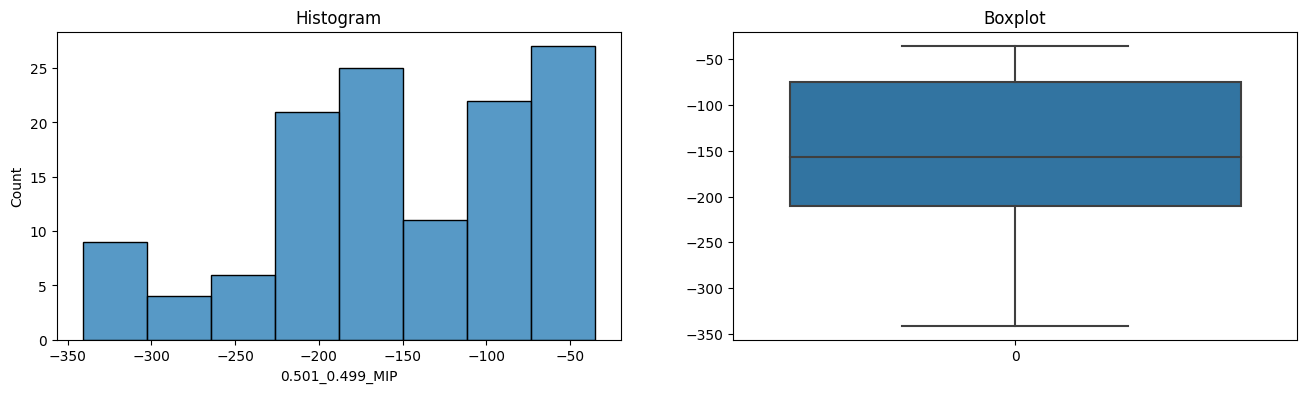

In [14]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.501_0.499_MIP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.501_0.499_MIP'])
plt.title('Boxplot')

plt.show()

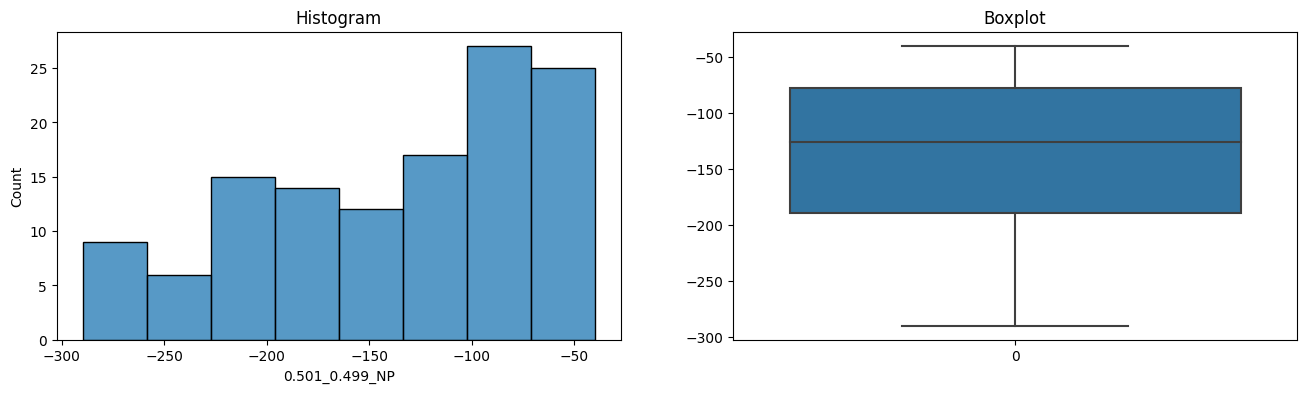

In [15]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.501_0.499_NP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.501_0.499_NP'])
plt.title('Boxplot')

plt.show()

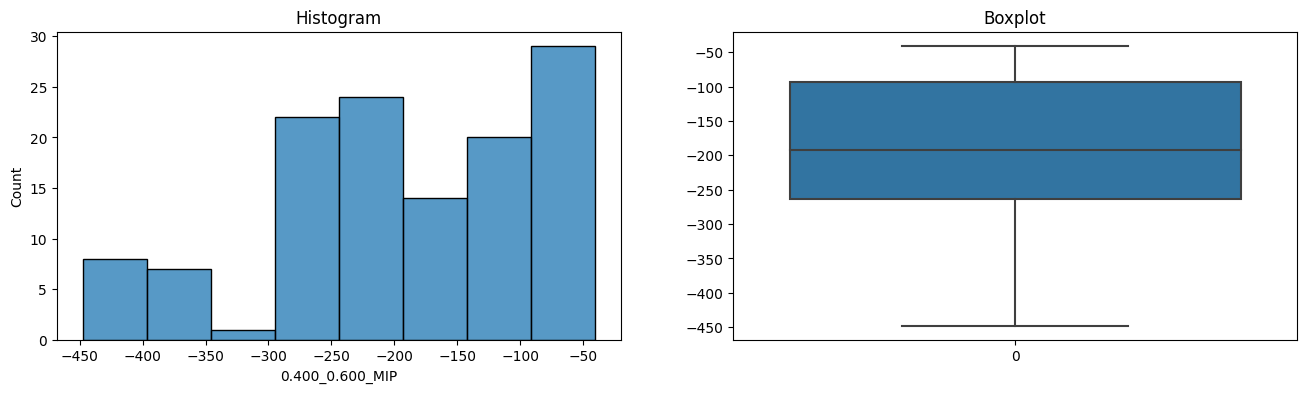

In [16]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.400_0.600_MIP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.400_0.600_MIP'])
plt.title('Boxplot')

plt.show()

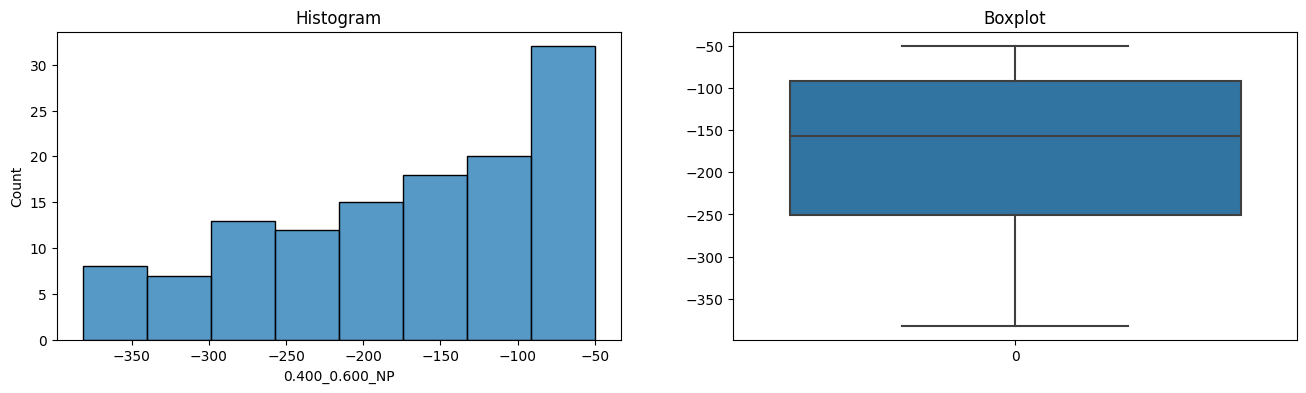

In [17]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.400_0.600_NP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.400_0.600_NP'])
plt.title('Boxplot')

plt.show()

Insight :
* Based on the histrogram above we can see almost all numerical features is normal distribution. for the precise result we can calcualte the distribution with statistic method

* Based on the boxplot we can identify there's no outliers occurs in the numerical features. for the precise result we can identify the outliers using Z-Score (for normal distribution) or IQR (for skew distribution)

#### 3. Correlation Analysis

Correlation analysis is used to understand and quantify the degree of relationship between two or more variables

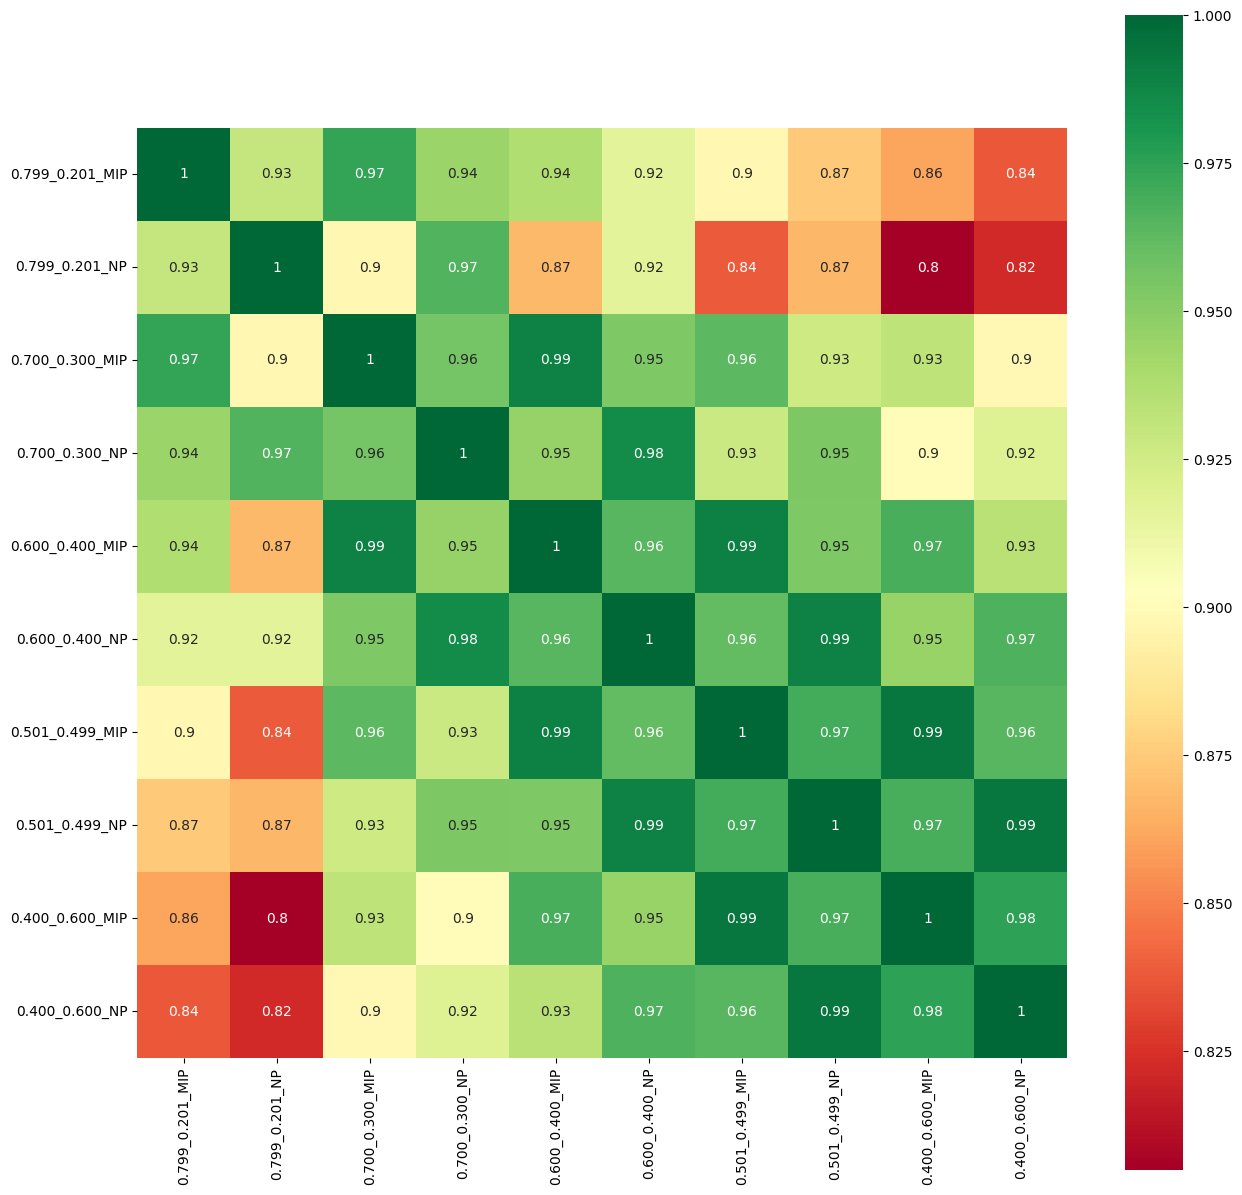

In [18]:
# create correlation matrix X_train
corr_matrix = df.drop(columns=['sensor','type']).corr()

#plot using seaborn heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,vmax=1,square=True,annot=True,cmap='RdYlGn')
plt.show()

Insight :
* Based on the heatmap above we can see each feature is higly positively correlated (> 0.7) 

### V. Data Preprocessing

#### 1. Check Missing Values for target variable (type)

In [19]:
# check missing values target variable
df['type'].isnull().sum()

0

there's no missing values in target variable

#### 2. Mapping target variable to number

In [20]:
# change target variable 'satisfaction' to number
mapping = {'1-Octanol':0,'1-Propanol':1,'2-Butanol':2,'2-propanol':3,'1-isobutanol':4}
df['type'] = df['type'].map(mapping)

#### 3. Check Duplicated Data

In [21]:
# check duplicates
df.duplicated().sum()

0

there's no duplicated data

#### 4. Splitting Dataset

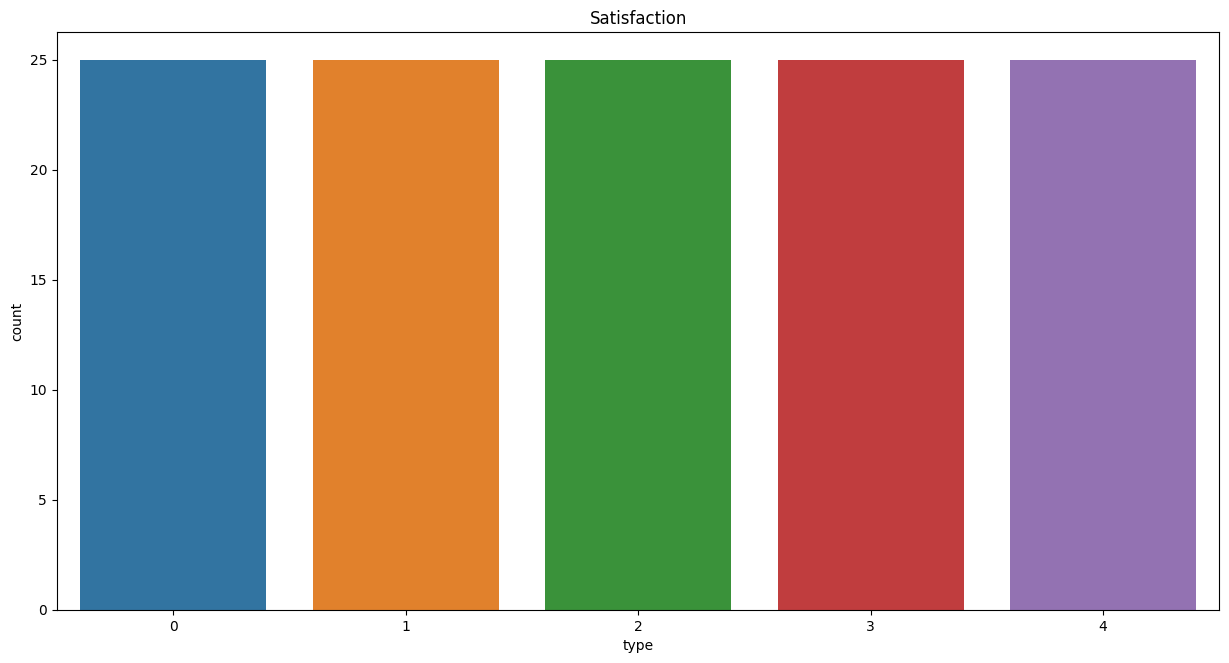

type
0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: proportion, dtype: float64


In [22]:
#countplot for y
plt.figure(figsize=(15,7.5))
sns.countplot(x=df.type)
plt.title('Satisfaction')
plt.show()

# percentage of y
print(df.type.value_counts(normalize=True))

In [23]:
# split data to X and y
X = df.drop(['type'], axis=1)
y = df['type']

In [170]:
# split X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random)

# X_train shape
print('X_train shape: ', X_train.shape)

# X_test shape
print('X_test shape: ', X_test.shape)

X_train shape:  (100, 11)
X_test shape:  (25, 11)


#### 5. identify Outlier from Train Dataset

In [171]:
X_train_num = X_train.drop(columns=['sensor'])
X_train_outlier = detect_outlier(X_train_num)
X_train_outlier.detect_outlier()

,feature,skewness,distribution,left_tail,right_tail,total_outlier,percentage
0,0.799_0.201_MIP,0.130120,normal,0,0,0,0.0
1,0.799_0.201_NP,0.056386,normal,0,0,0,0.0
2,0.700_0.300_MIP,-0.023643,normal,0,0,0,0.0
3,0.700_0.300_NP,-0.069339,normal,0,0,0,0.0
4,0.600_0.400_MIP,-0.240833,normal,0,0,0,0.0
5,0.600_0.400_NP,-0.257233,normal,0,0,0,0.0
6,0.501_0.499_MIP,-0.395967,normal,0,0,0,0.0
7,0.501_0.499_NP,-0.384480,normal,0,0,0,0.0
8,0.400_0.600_MIP,-0.558462,skew,0,0,0,0.0
9,0.400_0.600_NP,-0.516758,skew,0,0,0,0.0


based on the result we can find there's no outlier on the train data

#### 6. Identify Missing values from Train & Test Dataset

In [172]:
# check missing values X_train
X_train.isnull().sum()

0.799_0.201_MIP    0
0.799_0.201_NP     0
0.700_0.300_MIP    0
0.700_0.300_NP     0
0.600_0.400_MIP    0
0.600_0.400_NP     0
0.501_0.499_MIP    0
0.501_0.499_NP     0
0.400_0.600_MIP    0
0.400_0.600_NP     0
sensor             0
dtype: int64

In [173]:
# check missing values X_train
X_test.isnull().sum()

0.799_0.201_MIP    0
0.799_0.201_NP     0
0.700_0.300_MIP    0
0.700_0.300_NP     0
0.600_0.400_MIP    0
0.600_0.400_NP     0
0.501_0.499_MIP    0
0.501_0.499_NP     0
0.400_0.600_MIP    0
0.400_0.600_NP     0
sensor             0
dtype: int64

there's no missing values

#### 7. Feature Scaling & Encoding

we using StandarScaler for numerical features  and One Hot Encoding for categorical feature

In [174]:
cat_column = ['sensor']
num_column = X_train.drop(columns=['sensor']).columns

pipe_cat = Pipeline([
    ('cat_num',OneHotEncoder(handle_unknown='ignore'))
])

pipe_num = Pipeline([
    ('norm_num',StandardScaler())
])

pipe_fe = ColumnTransformer([
    ('pipe_cat', pipe_cat, cat_column),
    ('pipe_num', pipe_num, num_column),
])

In [175]:
X_train_scale_enc = pipe_fe.fit_transform(X_train)
X_test_scale_enc = pipe_fe.transform(X_test)

In [176]:
X_train_scale_enc.shape[1]

15

In [177]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### VI. Model Definition

In [185]:
# declare model
model_seq = keras.models.Sequential([
     keras.layers.Input(shape=X_train_scale_enc.shape[1],),
     keras.layers.Dense(32, activation="relu"),
     keras.layers.Dropout(0.1),
     keras.layers.Dense(5, activation='softmax')
     ])

# compile
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model_seq.compile(loss='categorical_crossentropy',
               optimizer=optimizer, # adaptive & momentum
               metrics=['accuracy'])



### VII. Model Training

In [186]:
# training
history_seq = model_seq.fit(X_train_scale_enc,y_train_encoded,epochs=100,validation_split=0.2)

Epoch 1/100


3/3 [==============================] - 1s 182ms/step - loss: 1.8308 - accuracy: 0.1625 - val_loss: 1.5864 - val_accuracy: 0.1000
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 1.5008 - accuracy: 0.3625 - val_loss: 1.2448 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 1.3543 - accuracy: 0.4125 - val_loss: 1.0978 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 1.2996 - accuracy: 0.4875 - val_loss: 1.0215 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 1.1963 - accuracy: 0.5250 - val_loss: 0.9976 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 1.1662 - accuracy: 0.5375 - val_loss: 0.9897 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 1.0856 - accuracy: 0.5250 - val_loss: 0.9836 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==============

   
   ### VIII. Model Evaluation

In [187]:
metrics_seq = pd.DataFrame(history_seq.history)
metrics_seq.head()

,loss,accuracy,val_loss,val_accuracy
0,1.830782,0.1625,1.586395,0.1
1,1.500822,0.3625,1.244785,0.5
2,1.354328,0.4125,1.097798,0.5
3,1.299622,0.4875,1.021482,0.5
4,1.196274,0.5250,0.997555,0.5


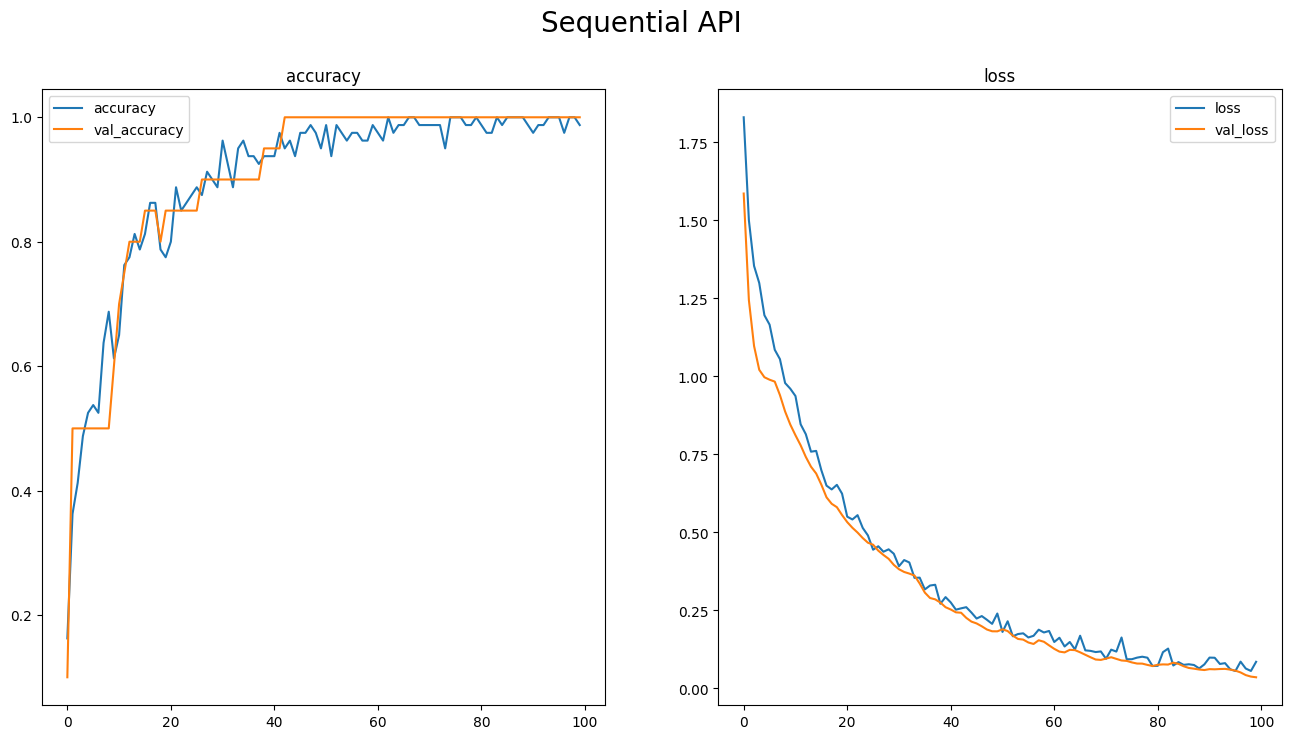

In [188]:
plt.figure(figsize=(16,8))
plt.suptitle('Sequential API',fontsize=20)
plt.subplot(1,2,1)
plt.title('accuracy')
plt.plot(metrics_seq[['accuracy','val_accuracy']],label=['accuracy','val_accuracy'])
plt.legend()
plt.subplot(1,2,2)
plt.title('loss')
plt.plot(metrics_seq[['loss','val_loss']],label=['loss','val_loss'])
plt.legend()
plt.show()

In [189]:
result = model_seq.evaluate(train_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')

44/44 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 1.0000
Test - Loss     :  0.043362975120544434
Test - Accuracy :  1.0



In [190]:
result = model_seq.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')

19/19 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 1.0000
Test - Loss     :  0.036402810364961624
Test - Accuracy :  1.0



In [191]:
target_names = ['1-Octanol','1-Propanol','2-Butanol','2-propanol','1-isobutanol'] 
y_pred = model_seq.predict(X_test_scale_enc)
y_pred = np.argmax(y_pred,axis=1)
print(classification_report(y_pred,y_test,target_names=target_names))

1/1 [==============================] - 0s 71ms/step
              precision    recall  f1-score   support

   1-Octanol       1.00      1.00      1.00         4
  1-Propanol       1.00      1.00      1.00         5
   2-Butanol       1.00      1.00      1.00         5
  2-propanol       1.00      1.00      1.00         6
1-isobutanol       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

